In [1]:
#plota uma imagem fits usando suas informações para criar o tamanho dos eixos.
#Esse script inverte o mapa de cores e cria um barramento de 'intesidade'.
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
%matplotlib inline


/home/JackS/anaconda3/lib/python3.7/site-packages/mpl_toolkits/axes_grid/__init__.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  obj_type='module')


Using matplotlib backend: Qt5Agg


Filename: teste.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   (516, 507)   float32   
<class 'numpy.ndarray'>
(507, 516)
Min: nan
Max: nan
Mean: nan
Stdev: nan


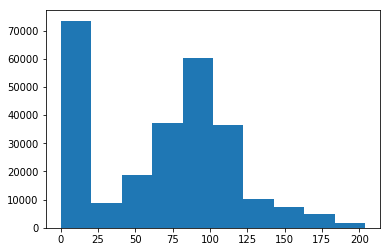

In [6]:
#É importante entender a distribuição de pixels para saber os limites vmin e vmax.
#E assim obter uma boa visualização do astro.
filename = get_pkg_data_filename('teste.fits')
fits.info(filename)

hdu = fits.open(filename)
image_data = hdu[0].data

print(type(image_data)) 
print(image_data.shape) #imprime as dimensões em pixel
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

NBINS = 10
histogram = plt.hist(image_data.flatten(), NBINS)

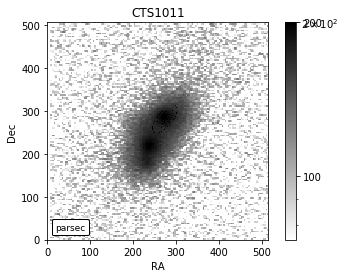

In [15]:
#plot da imagem
fig = plt.figure()
ax = fig.add_subplot(111)
plt.imshow(image_data, origin='lower', cmap='gray_r',norm=LogNorm(vmin=75, vmax=200))

cbar = plt.colorbar(ticks=[100,200])
cbar.ax.set_yticklabels(['100','200'])

plt.title('CTS1011')
plt.xlabel('RA')
plt.ylabel('Dec')
at = AnchoredText('parsec',prop=dict(size=9), frameon=True,loc=3,)
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)
# plt.savefig("figura.eps") #Tirar o '#' se quiser salvar a imagem automaticamente
plt.show()
plt.close()